In [1]:
import warnings
warnings.filterwarnings('ignore')
# For ignoring warnings printed by R magic commands

In [2]:
import os
import glob

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [4]:
# Load R magic
%load_ext rpy2.ipython
# Import ggplot2
%R require(ggplot2);

In [5]:
# If experiment parameters change, modify this function
def AddParametersAsColumns(df, file):
    expParams = file.split('/')[-1].split('.')[1].split('_')
    df['numHeaders'] = int(expParams[4])
    df['isCombined'] = True if len(expParams) > 6 else False
    df['pairId'] = [int(i / 2) for i in range(len(df))]  
    
# Turns all files of a given filname across a set of folders into a single dataframe
def DataSetAsDataFrame(files, headers, header=None, reset_index=True):
    # Read dataset as dataframe
    def ReadDataSet(file):
        df = pd.read_csv(file, sep=',', header=header, names=headers)
        AddParametersAsColumns(df, file)
        return df
    # Get the list of dataframes
    dfs = map(ReadDataSet, files)
    # Combine into a single dataframe
    df = pd.concat(dfs)
    if reset_index:
        df.reset_index(inplace=True)
        df.drop('index', axis=1, inplace=True)
    return df

In [6]:
%%R 
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [7]:
directory = '../../../../results/benchmarks/vswitch-adding-headers/throughput/'
files = glob.glob(directory + 'rx__*.csv')

In [8]:
df = DataSetAsDataFrame(files,  ['dev', 'Mpps', 'Mbps'])

In [9]:
df.head()

,dev,Mpps,Mbps,numHeaders,isCombined,pairId
0,0,3.22,5868.52,5,False,0
1,1,3.36,6132.56,5,False,0
2,0,3.22,5867.66,5,False,1
3,1,3.36,6131.88,5,False,1
4,0,3.22,5868.74,5,False,2


In [10]:
plot_df = df.groupby(['numHeaders', 'isCombined', 'pairId']).sum()
plot_df.reset_index(inplace=True)

In [11]:
plot_df_combined = plot_df[(plot_df['isCombined'] == True) | (plot_df['numHeaders'] == 0)]

In [12]:
plot_df_combined.groupby(['numHeaders', 'isCombined'])[['Mpps', 'Mbps']].describe()

Mpps                                                   \
                      count       mean       std    min    25%    50%    75%   
numHeaders isCombined                                                          
0          False        9.0  14.538889  0.003333  14.53  14.54  14.54  14.54   
5          True         9.0  10.957778  0.006667  10.94  10.96  10.96  10.96   
10         True         9.0   9.000000  0.000000   9.00   9.00   9.00   9.00   
15         True         9.0   7.480000  0.000000   7.48   7.48   7.48   7.48   
20         True         9.0   6.520000  0.000000   6.52   6.52   6.52   6.52   
25         True         9.0   5.680000  0.000000   5.68   5.68   5.68   5.68   
30         True         9.0   5.100000  0.000000   5.10   5.10   5.10   5.10   

                              Mbps                                     \
                         max count          mean        std       min   
numHeaders isCombined                                                   
0          False       14.54   9.0  19999.075556   1.566805  19995.91   
5          True        10.96   9.0  19996.262222  10.730765  19967.65   
10         True         9.00   9.0  19999.854444   0.180632  19999.58   
15         True         7.48   9.0  19999.862222   0.200423  19999.55   
20         True         6.52   9.0  19999.853333   0.211778  19999.54   
25         True         5.68   9.0  19999.858889   0.218429  19999.52   
30         True         5.10   9.0  19999.858889   0.220423  19999.54   

                                                               
                            25%       50%       75%       max  
numHeaders isCombined                                          
0          False       19999.63  19999.69  20000.00  20000.08  
5          True        19999.67  19999.74  20000.01  20000.05  
10         True        19999.71  19999.86  19999.99  20000.12  
15         True        19999.72  19999.86  20000.01  20000.17  
20         True        19999.69  19999.85  20000.01  20000.17  
25         True        19999.70  19999.86  20000.02  20000.20  
30         True        19999.68  19999.86  20000.03  20000.18

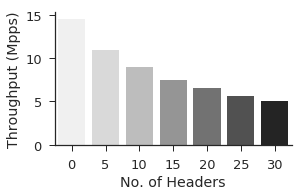

In [14]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='numHeaders', y='Mpps', data=plot_df_combined, palette="Greys",
                   size=3, kind="bar", legend=True, legend_out=False, aspect=1.5, ci='sd')
ax.set(xlabel='No. of Headers', ylabel='Throughput (Mpps)')
# plt.savefig('vswitch-adding-headers-throughput-mpps.pdf')
plt.show()

In [15]:
plot_df_combined['Gbps'] = plot_df_combined['Mbps'] / 1024

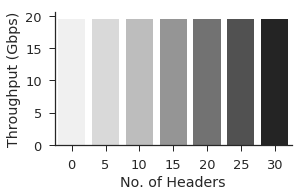

In [16]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='numHeaders', y='Gbps', data=plot_df_combined, palette="Greys",
                   size=3, kind="bar", legend=True, legend_out=False, aspect=1.5, ci='sd')
ax.set(xlabel='No. of Headers', ylabel='Throughput (Gbps)')
# plt.savefig('vswitch-adding-headers-throughput-gbps.pdf')
plt.show()

In [17]:
plot_df_combined.head()

,numHeaders,isCombined,pairId,dev,Mpps,Mbps,Gbps
0,0,False,0,1,14.54,20000.08,19.531328
1,0,False,1,1,14.54,19999.63,19.530889
2,0,False,2,1,14.53,19995.91,19.527256
3,0,False,3,1,14.54,19999.68,19.530938
4,0,False,4,1,14.54,20000.03,19.531279


In [26]:
plot_df_combined[['numHeaders', 'Mpps', 'Mbps', 'Gbps']].to_csv(directory + 'throughput_combined_headers.csv', index=False)

In [18]:
plot_df_no_combined = plot_df[plot_df['isCombined'] == False]

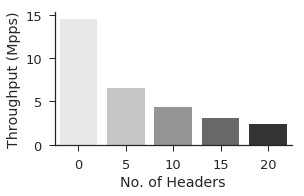

In [25]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='numHeaders', y='Mpps', data=plot_df_no_combined, palette="Greys",
                   size=3, kind="bar", legend=True, legend_out=False, aspect=1.5, ci='sd')
ax.set(xlabel='No. of Headers', ylabel='Throughput (Mpps)')
plt.savefig('vswitch-adding-separate-headers-throughput-mpps.pdf')
plt.show()

In [20]:
plot_df_no_combined['Gbps'] = plot_df_no_combined['Mbps'] / 1024

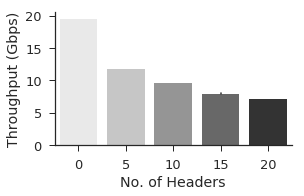

In [23]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='numHeaders', y='Gbps', data=plot_df_no_combined, palette="Greys",
                   size=3, kind="bar", legend=True, legend_out=False, aspect=1.5, ci='sd')
ax.set(xlabel='No. of Headers', ylabel='Throughput (Gbps)')
plt.savefig('vswitch-adding-separate-headers-throughput-gbps.pdf')
plt.show()

In [26]:
plot_df_no_combined[['numHeaders', 'Mpps', 'Mbps', 'Gbps']].to_csv(directory + 'throughput_separate_headers.csv', index=False)